In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### We look at what is inside of our data

In [3]:
df = pd.read_excel('./structured_data/success/final_success_data.xlsx')
df.head(8)

,State,Started in,Industries,Number of employees,Funding,Number of investors
0,T'ai-pei,2019,Content,1,"$1,420,000",9
1,T'ai-pei,2014,Beauty,251,"$75,000,000",7
2,T'ai-pei,2011,Automotive,501,"$480,000,000",9
3,T'ai-pei,2014,E-Commerce,251,"$107,000,000",12
4,T'ai-pei,1998,Consumer Software,1001,"$315,000,000",8
5,T'ai-pei,2013,Apps,251,"$9,000,000",5
6,T'ai-pei,2015,Apps,251,"$108,000,000",13
7,T'ai-pei,2017,Internet,251,"$51,500,000",8


In [6]:

df.tail(8)

,State,Started in,Industries,Number of employees,Funding,Number of investors
3556,Harjumaa,2000,Consulting,501,"€ 84,000,000",1
3557,Harjumaa,2012,Artificial Intelligence,11,"$11,329,784",13
3558,Harjumaa,2020,Artificial Intelligence,11,"$1,500,000",7
3559,Harjumaa,2018,Financial Services,11,"$3,821,779",9
3560,Harjumaa,2017,Cryptocurrency,11,"€ 923,000",1
3561,Al Kuwayt,2015,Beauty,501,"$45,000,000",1
3562,Al Kuwayt,2017,E-Commerce,101,"$2,750,000",4
3563,Al Kuwayt,2016,B2B,101,"$20,900,000",1


As we can see, on first column these are all States, not Country name, so we need to convert them, to country by dictionary. First, we should count how many different states are in there.

In [7]:
print('Number of unique states in the dataset:', len(df['State'].unique()))

Number of unique states in the dataset: 261


I should use either an additional library or make a dictionary for this countries.
Chatgpt is better to make a dictionary of countries

In [4]:
import states_with_countries
locations = states_with_countries.locations
df['Country'] = df['State'].map(locations)
df.head(10)

,State,Started in,Industries,Number of employees,Funding,Number of investors,Country
0,T'ai-pei,2019,Content,1,"$1,420,000",9,Taiwan
1,T'ai-pei,2014,Beauty,251,"$75,000,000",7,Taiwan
2,T'ai-pei,2011,Automotive,501,"$480,000,000",9,Taiwan
3,T'ai-pei,2014,E-Commerce,251,"$107,000,000",12,Taiwan
4,T'ai-pei,1998,Consumer Software,1001,"$315,000,000",8,Taiwan
5,T'ai-pei,2013,Apps,251,"$9,000,000",5,Taiwan
6,T'ai-pei,2015,Apps,251,"$108,000,000",13,Taiwan
7,T'ai-pei,2017,Internet,251,"$51,500,000",8,Taiwan
8,T'ai-pei,2018,Artificial Intelligence,11,"$4,300,000",5,Taiwan
9,T'ai-pei,2011,Analytics,101,"$30,300,000",5,Taiwan


### Which country has the highest number of  successfull start-ups

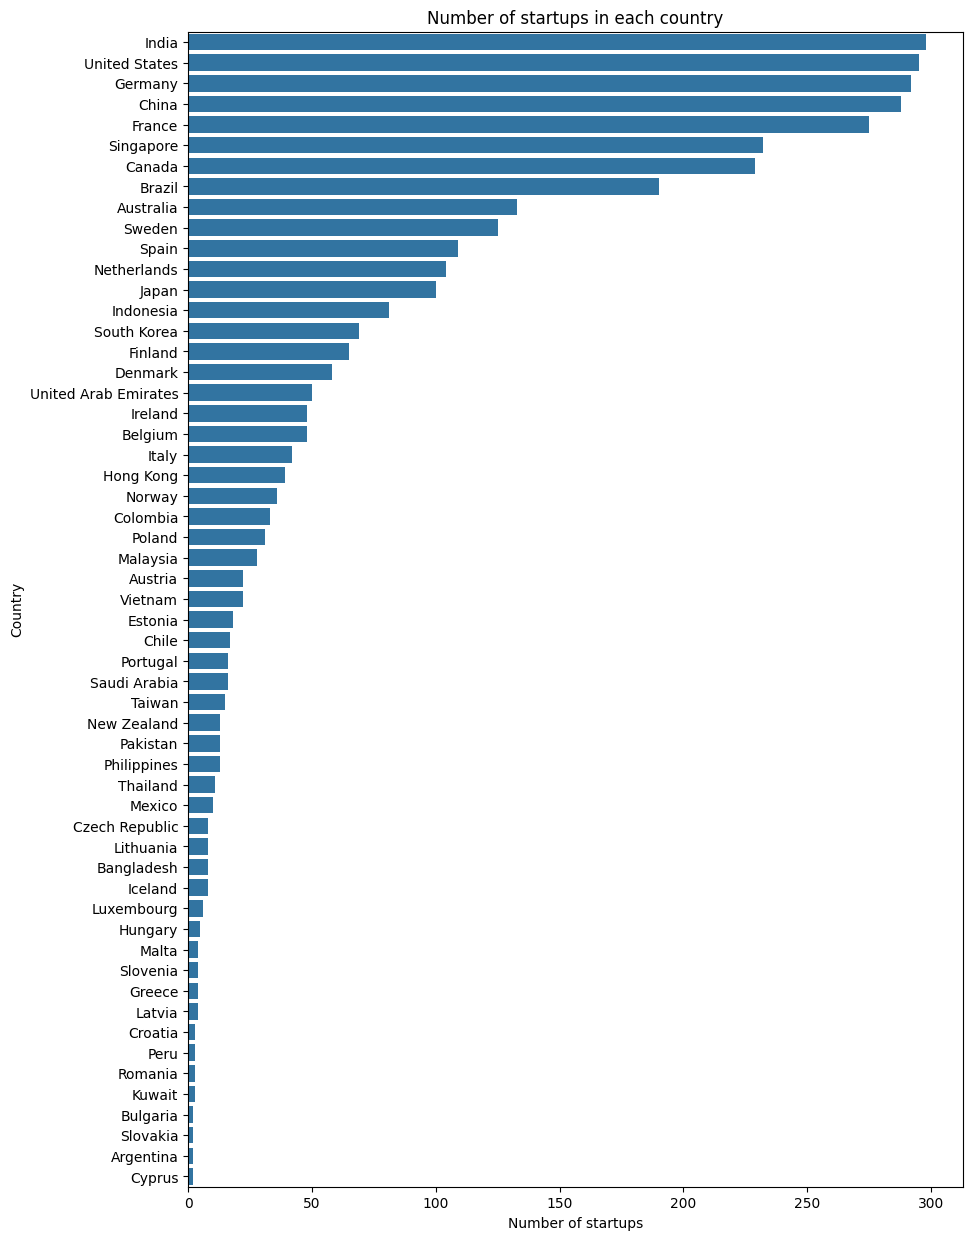

In [14]:
plt.figure(figsize=(10, 15))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of startups in each country')
plt.xlabel('Number of startups')
plt.ylabel('Country')
plt.show()

From which year start-ups started in specific country, and how is the growth rate, Example with 5 countries
1. India - top
2. United States - top
3. Australia - middle
4. Cyprus - lowest
5. Croatia - lowest

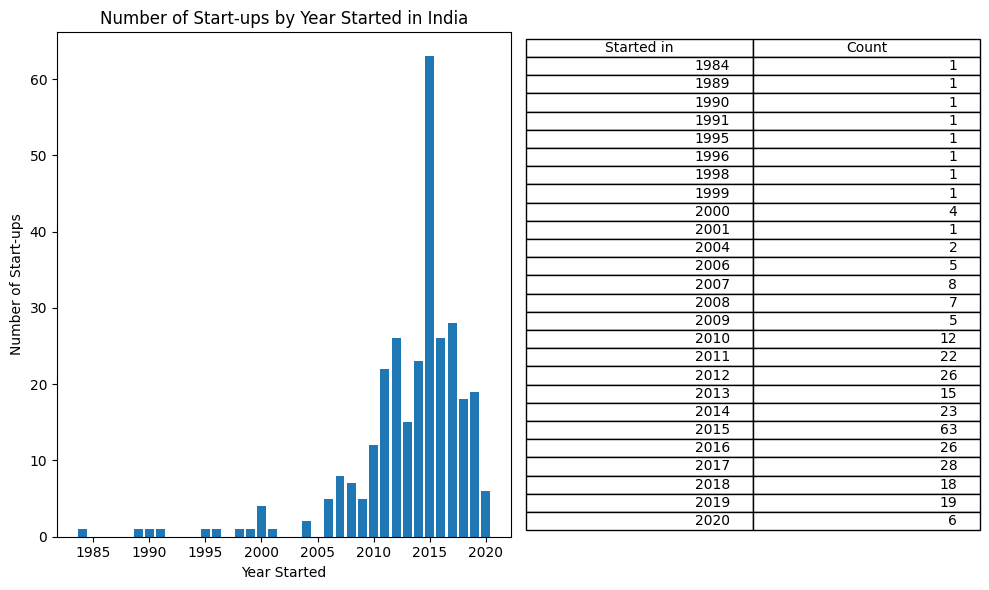

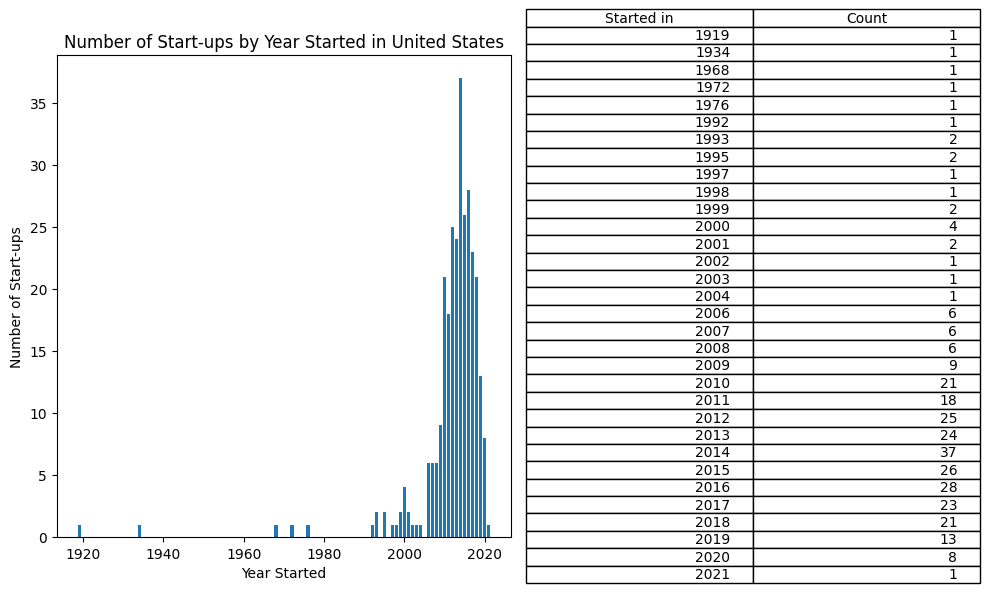

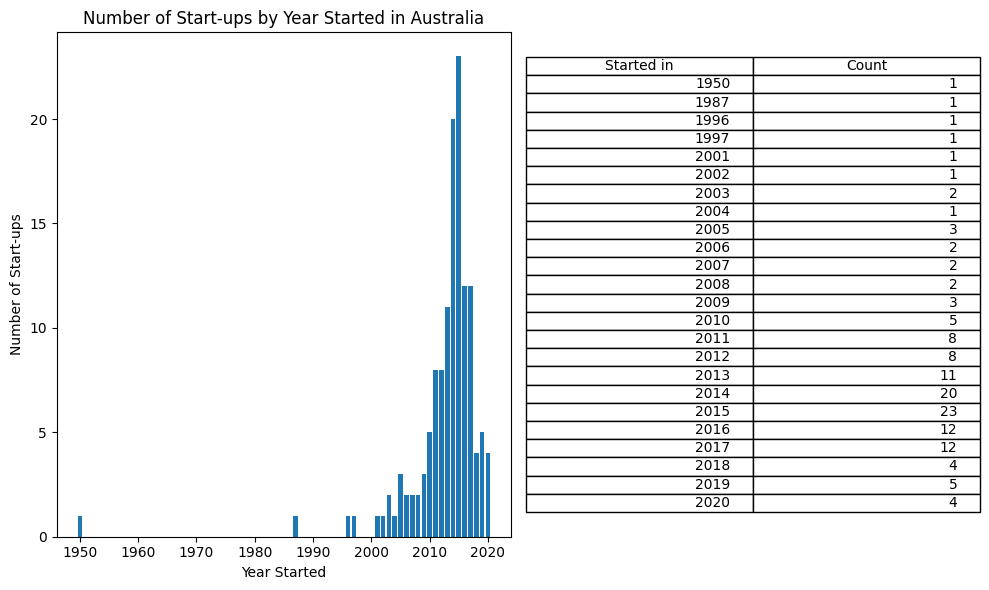

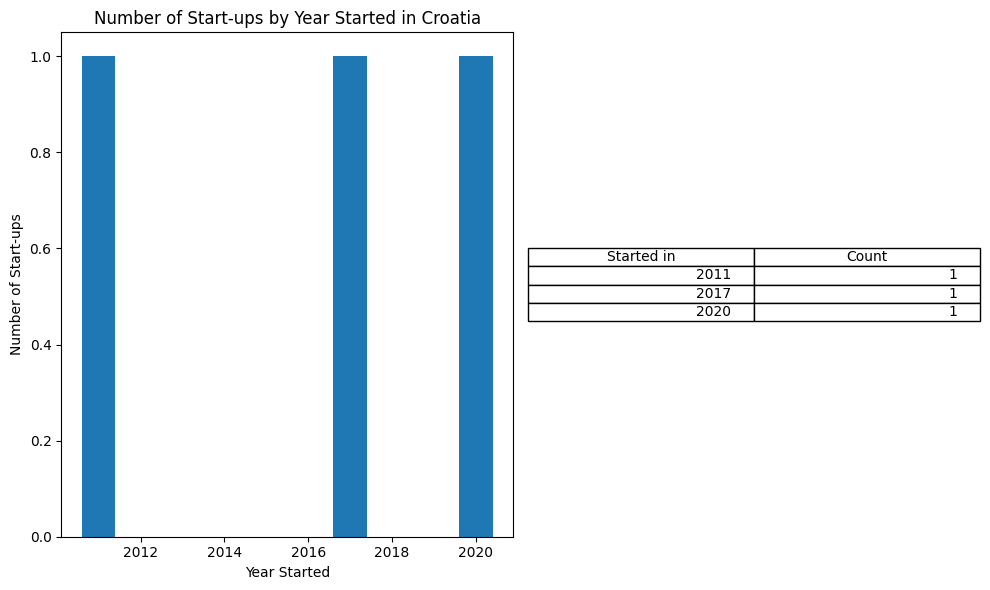

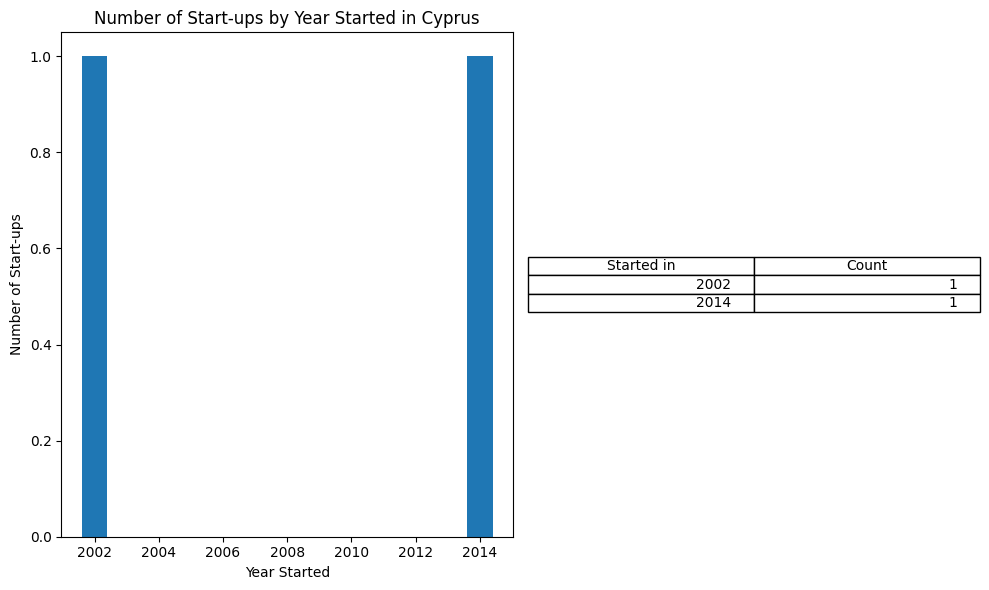

In [27]:
def get_startups_data_by_year(country):
    df_country = df[df['Country'] == country]
    # Group by 'Started in', count unique start-ups
    startups_per_year_country = df_country.groupby('Started in').size().reset_index(name='Count')

    # Plotting
    plt.figure(figsize=(10, 6))

    # Bar chart
    plt.subplot(1, 2, 1)
    plt.bar(startups_per_year_country['Started in'], startups_per_year_country['Count'])
    plt.xlabel('Year Started')
    plt.ylabel('Number of Start-ups')
    plt.title('Number of Start-ups by Year Started in ' + country)

    # Table
    plt.subplot(1, 2, 2)
    plt.axis('off')  # Hide axis
    plt.table(cellText=startups_per_year_country.values,
            colLabels=startups_per_year_country.columns,
            loc='center')

    plt.tight_layout()
    plt.show()

get_startups_data_by_year('India')
get_startups_data_by_year('United States')
get_startups_data_by_year('Australia')
get_startups_data_by_year('Croatia')
get_startups_data_by_year('Cyprus')

## Observation N% 1
1. Based on above tables, can we guess 2015 is the year for most start-ups begin in all countries, as comparing to India?

        1. Find the highest number of start-ups begin for every country.
        
        2. Than make a t-test with comparing to India.

2. There are two types of guesses we can make:
   - Null hypothesis (H0): Nothing special is going on. 2015 is not the year for all countries for where the highest number of start-ups begin like in India 2015.
   
   - Alternative hypothesis (H1): Something special is happening.  Almost all countries shared the same highest number of start-ups like India in 2015.

3. How do we decide which guess is right? We use something called a p-value. If the p-value is less than 0.05, it means that our data strongly suggests that the alternative hypothesis (something special is happening) is correct, so we reject the null hypothesis (nothing special is going on). If the p-value is more than 0.05, it means our data doesn't strongly suggest that something special is happening, so we don't reject the null hypothesis.


In [18]:
from scipy.stats import ttest_ind
# Convert 'Started in' to numeric
df['Started in'] = pd.to_numeric(df['Started in'], errors='coerce')

# Group by 'Country' and 'Started in' and count the number of startups
startup_counts = df.groupby(['Country', 'Started in']).size()
# Find the year with the highest number of startups for each country
max_startup_counts = startup_counts.groupby(level=0).idxmax()
# Get the counts for the year with the highest number of startups for each country
max_counts = startup_counts.loc[max_startup_counts]

# Separate the counts for India in 2015 and the max counts for other countries
india_2015_count = startup_counts.loc[('India', 2015)]
other_max_counts = max_counts[max_counts.index.get_level_values(0) != 'India']

# Perform t-test
t_stat, p_value = ttest_ind([india_2015_count], other_max_counts)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 4.693007760893612
P-value: 1.8807692906117945e-05


## Observation 2nd
####    Which industry is leading with funding amount? 
        1. I need to convert $ numbers to actual integers.
        2. I make a diagram to see the funding amount by industry.

another issue, all the fundings in their currency, not in dollar, we need to convert it

In [5]:
# select the funding column from df and drop rows with empty values
funding = df['Funding'].dropna()
symbols_and_abbreviations = {
    '$': 1, ',': 1, '€': 1.1, '£': 1.3, '₹': 0.013, '¥': 0.007, 'DKK': 0.15, 'SEK': 0.12, 'NOK': 0.11, 'AUD': 0.74,
    'CAD': 0.79, 'NZD': 0.71, 'SGD': 0.74, 'HKD': 0.13, 'CHF': 1.1, 'CNY': 0.16, 'KRW': 0.00088, 'INR': 0.013, 'JPY': 0.0074,
    'RUB': 0.013, 'EUR': 1.1, 'PLN': 0.27, 'HUF': 0.0033, 'CZK': 0.046, 'BRL': 0.19, 'TRY': 0.054, 'ZAR': 0.065, 'IDR': 0.000071,
    'PHP': 0.018, 'THB': 0.029, 'MYR': 0.24, 'VND': 0.000043, 'ARS': 0.010, 'CLP': 0.0013, 'COP': 0.00026, 'MXN': 0.054,
    'ILS': 0.28, 'SAR': 0.27, 'AED': 0.27, 'QAR': 0.27, 'KWD': 3.3, 'OMR': 2.6, 'BHD': 2.6, 'JOD': 1.4, 'EGP': 0.064,
    'PKR': 0.0063, 'LKR': 0.0055, 'BDT': 0.012, 'NPR': 0.0077, 'KZT': 0.0022, 'UZS': 0.000094, 'TJS': 0.087, 'AZN': 0.59,
    'GEL': 0.34, 'AMD': 0.0021, 'MDL': 0.055, 'UAH': 0.037, 'BYN': 0.4, 'KGS': 0.011, 'TMT': 0.29, 'MNT': 0.00034, 'MOP': 0.12,
    'TWD': 0.032, 'LAK': 0.000057, 'MMK': 0.00048, 'KHR': 0.00024, 'LBP': 0.00066, 'SYP': 0.00039, 'YER': 0.0040, 'IQD': 0.00068,
    'LYD': 0.21, 'DZD': 0.0076, 'MAD': 0.11, 'TND': 0.35, 'SDG': 0.0022, 'SSP': 0.0076, 'ERN': 0.067, 'ETB': 0.018, 'SOS': 0.0017,
    'UGX': 0.00027, 'RWF': 0.0011, 'BIF': 0.00051, 'TZS': 0.00043, 'KES': 0.0072, 'RON': 0.24, '₩' : 0.00088, '₽': 0.013, '₺': 0.12,
    'A': 0.01
}
def convert_to_usd(funding_series, conversion_rates):
    funding_series = funding_series.copy()  # Create a copy to avoid the SettingWithCopyWarning
    for i in range(len(funding_series)):
        if pd.isna(funding_series[i]):
            continue
        funding_series.iloc[i] = funding_series.iloc[i].replace(',', '')
        for symbol, rate in conversion_rates.items():
            if symbol in funding_series.iloc[i]:
                funding_series.iloc[i] = funding_series.iloc[i].replace(symbol, '').strip()
                if not isinstance(funding_series.iloc[i], float):
                    try:
                        funding_series.iloc[i] = float(funding_series.iloc[i]) * rate
                    except ValueError:
                        funding_series.iloc[i] = np.nan
                else:
                    funding_series.iloc[i] = funding_series.iloc[i] * rate
                break
    return funding_series

# Ensure the 'Funding' column is in string format
df['Funding'] = df['Funding'].astype(str)

# Clean and convert the 'Funding' column to USD
df['Funding'] = convert_to_usd(df['Funding'], symbols_and_abbreviations)
df['Funding'] = pd.to_numeric(df['Funding'], errors='coerce')


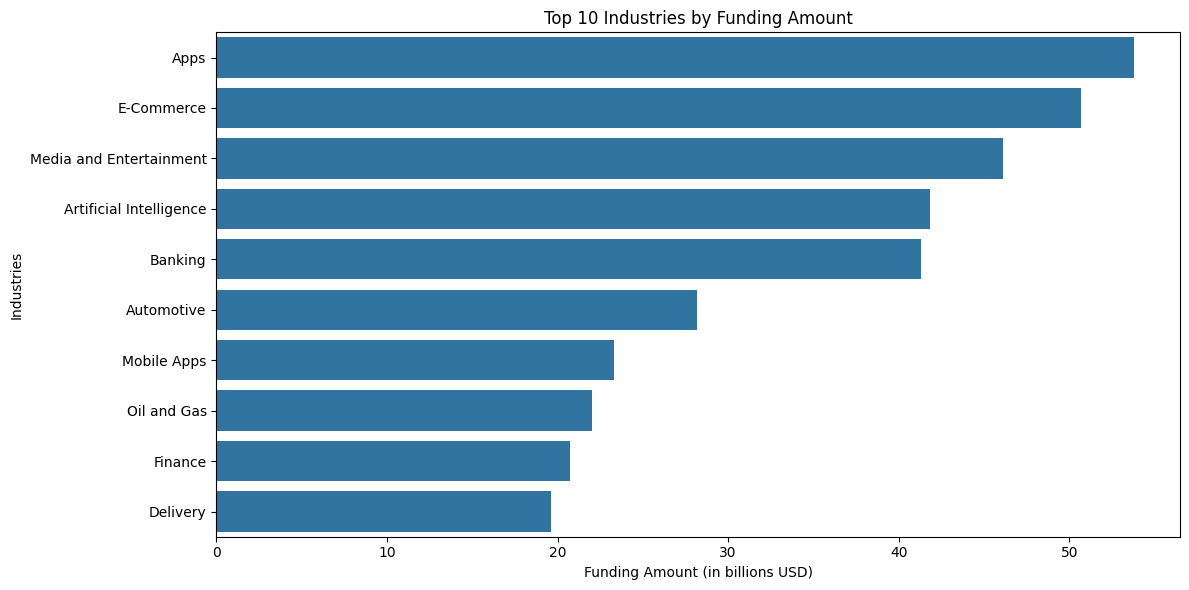

In [6]:
top_10_industries = df.groupby('Industries')['Funding'].sum().nlargest(10)
# Convert funding amounts to billions (with two decimal places)
top_10_funding_bln = (top_10_industries / 1e9).round(2)
# Sort industries by funding amount (ascending order)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_funding_bln, y=top_10_industries.index)
plt.title('Top 10 Industries by Funding Amount')
plt.xlabel('Funding Amount (in billions USD)')
plt.ylabel('Industries')

plt.tight_layout()
plt.show()